# GRIP: THE SPARKS FOUNDATION
## Data Science and Business Analytics Internship
##### Submitted by Shashank Choudhary 
#####    
### Task1: Prediction Using Supervised ML

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Reading .csv file with the link and creating the DataFrame

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Plotting the DataFrame

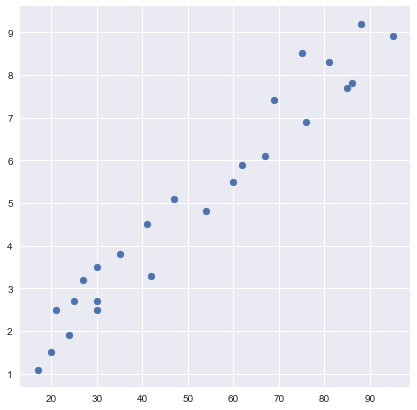

In [3]:
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
plt.scatter(df['Scores'],df['Hours'])

##### Linear Regression implimentation.

In [4]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(x,y,theta):
    m = x.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_= hypothesis(x[i],theta)
        grad[0]+=(y_-y[i])
        grad[1]+=(y_-y[i])*x[i]
    return grad/m

def error(x,y,theta):
    m = x.shape[0]
    tE = 0.0
    for i in range(m):
        y_ = hypothesis(x[i],theta)
        tE+=(y_-y[i])**2
    return tE/m

def gradientDecent(x,y,lr=0.1,max_step=100):
    theta = np.zeros((2,))
    er = []
    for i in range(max_step):
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        er.append(e)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
    return theta, er

In [5]:
x,y = df['Hours'],df['Scores']

##### Converting into numpy array.


In [6]:
x = x.values
y = y.values

##### Normalising the data.

In [7]:
x1 = (x - x.mean())/x.std()

##### Splitting the dataset.

In [8]:
split = int(0.8*x1.shape[0])

In [9]:
x_train = x1[:split]
x_test = x1[split:]
y_train = y[:split]
y_test =y[split:]

In [10]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(20,) (5,)
(20,) (5,)


##### Reshaping:
    x_train, x_test, y_train, y_test 

In [11]:
x_train = x_train.reshape((20,1))
y_train = y_train.reshape((20,1))
x_test = x_test.reshape((5,1))
y_test = y_test.reshape((5,1))

In [12]:
theta,error = gradientDecent(x_train,y_train)

In [13]:
print(theta)

[50.74600888 23.55378545]


##### Plotting error.
Here we can clearly see that the error is reduced.


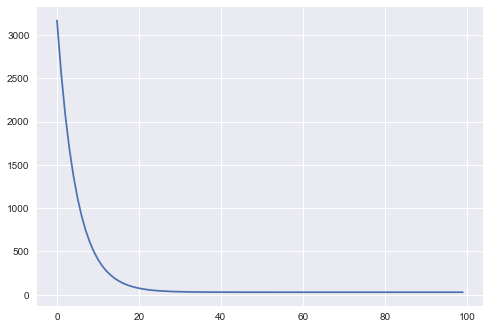

In [14]:
plt.plot(error)

##### Predictions

In [15]:
y_ = hypothesis(x_train,theta)
print(y_)

[[26.83118573]
 [51.5837893 ]
 [33.49534823]
 [83.95257859]
 [36.35141788]
 [17.31095359]
 [90.61674109]
 [55.39188216]
 [82.04853216]
 [28.73523216]
 [76.33639288]
 [59.19997502]
 [45.87165002]
 [34.44737145]
 [13.50286073]
 [87.76067145]
 [26.83118573]
 [21.11904645]
 [61.10402145]
 [73.48032323]]


##### Plotting the best fit line.

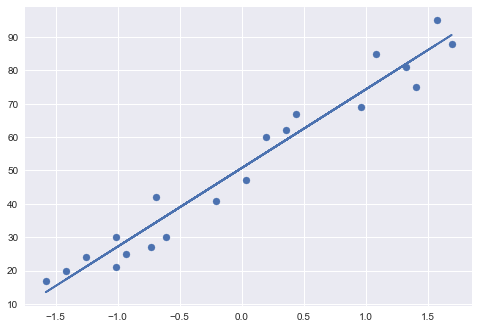

In [16]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_)

##### Calculating R2 score - accuracy

In [17]:
def r2_score(y,y_):
    # numerator
    num=np.sum((y-y_)**2)
    # denomenator
    denom=np.sum((y-y.mean())**2)
    # score
    score=1-num/denom
    return score*100

r2_score(y_train,y_)

95.54562415814351

In [18]:
y_pred = hypothesis(x_test,theta)
print(y_pred)

[[28.73523216]
 [48.72771966]
 [39.20748752]
 [68.72020716]
 [77.28841609]]


In [24]:
df=pd.DataFrame(y_test,columns=['Actual'])
df['Predicted']=y_pred

In [25]:
df

,Actual,Predicted
0,30,28.735232
1,54,48.727720
2,35,39.207488
3,76,68.720207
4,86,77.288416


##### Training our own data.

In [28]:
h = float(input('Enter number of hours per day? '))
print('No of hours : ', h,'hrs/day')

# normalising hour
h=(h-x.mean())/x.std()
y_=hypothesis(h,theta)

print('Predicted Percentage : %.2f'%y_)

Enter number of hours per day? 9.25
No of hours :  9.25 hrs/day
Predicted Percentage : 91.09


## Conclusion: 
#### The predicted score of the student is 92.4 if the student studies for 9.25 hrs/day.